# Pandas - Toxic Comments EDA

Наша мета провести первинний аналіз даних змагання на Kaggle [Toxic Comment Classification Challenge](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge)

Дані можна завантажити тут - https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data

In [1]:
#basics
import pandas as pd
import numpy as np

### Load data

Завантажуємо датасет:

In [2]:
# from google.colab import drive
# drive.mount("/content/drive")

In [5]:
file_path = 'https://drive.usercontent.google.com/download?id=1ANfU79tnprwY8G3wUivTFRUdfZ30UCXH&export=download&authuser=0&confirm=t&uuid=3511b2b6-af43-4f8b-a576-d21394c14b23&at=APZUnTVkyAdeRsSE_Kqv3Leu-hXu:1721781557408'
# train = pd.read_csv("/content/drive/MyDrive/projector_course_data/train_toxic.csv")
train = pd.read_csv(file_path)

`train` це [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).


### First look

Давайте подивимося на дані:

In [4]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
train.shape

(159571, 8)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [8]:
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Можемо дивитися окремо на кожну колонку, тоді ми будемо працювати з [Pandas Series](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html):

In [9]:
train["toxic"].sample(10)

153448    1
50992     0
35167     0
22516     0
3250      0
84771     0
94481     0
115428    0
48961     0
74905     0
Name: toxic, dtype: int64

In [10]:
train["toxic"].value_counts()

toxic
0    144277
1     15294
Name: count, dtype: int64

In [11]:
train["toxic"].value_counts(normalize=True)

toxic
0    0.904156
1    0.095844
Name: proportion, dtype: float64

Індексація DataFrame:

In [11]:
train.iloc[:5,2:]

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


Агрегації:

In [30]:
x = train.iloc[:,2:].sum()
x

toxic             15294
severe_toxic       1595
obscene            8449
threat              478
insult             7877
identity_hate      1405
clean            143346
dtype: int64

In [16]:
rowsums=train.iloc[:,2:].sum(axis=1)
rowsums

0         0
1         0
2         0
3         0
4         0
         ..
159566    0
159567    0
159568    0
159569    0
159570    0
Length: 159571, dtype: int64

Створимо нову фічу:

In [19]:
train["clean"]=(rowsums==0)

In [21]:
#count number of clean entries
print("Total comments = ", len(train))
print("Total clean comments = ", train["clean"].sum())
#print("Total tags =", x.sum())

Total comments =  159571
Total clean comments =  143346


In [24]:
train["clean"].value_counts()

clean
True     143346
False     16225
Name: count, dtype: int64

### Clean data

In [26]:
train.isnull().head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [28]:
train.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
clean            0
dtype: int64

In [27]:
print("Check for missing values in Train dataset")
null_check=train.isnull().sum()
print(null_check)
print("filling NA with \"unknown\"")

Check for missing values in Train dataset
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
clean            0
dtype: int64
filling NA with "unknown"


### Visualization

In [33]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("fivethirtyeight")

In [19]:
x

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

In [35]:
x.index

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate',
       'clean'],
      dtype='object')

In [36]:
x.values

array([ 15294,   1595,   8449,    478,   7877,   1405, 143346])

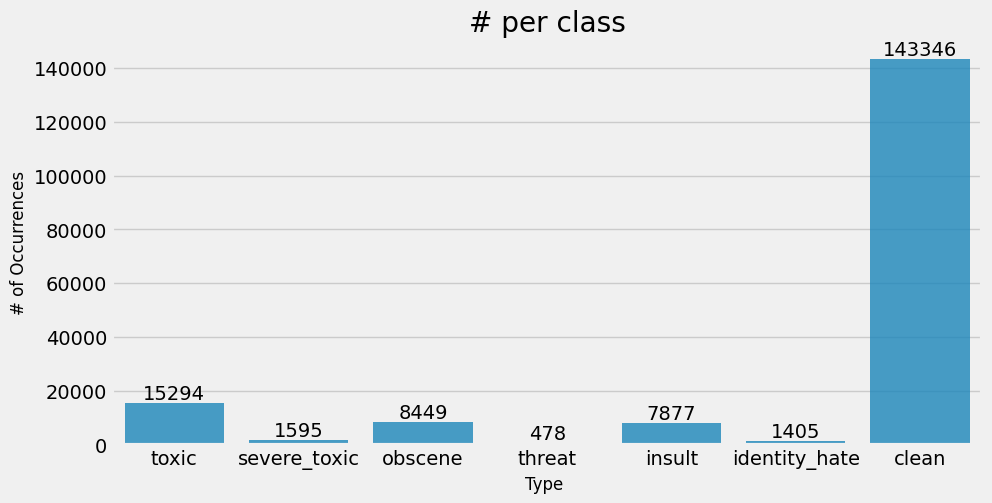

In [37]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x = x.index, y = x.values, alpha=0.8)
plt.title("# per class")
plt.ylabel("# of Occurrences", fontsize=12)
plt.xlabel("Type ", fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha="center", va="bottom")

plt.show()

### Multi tagging

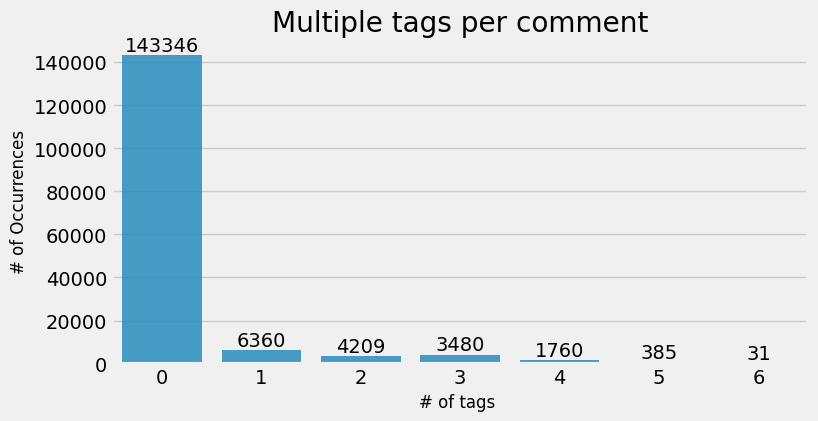

In [38]:
x=rowsums.value_counts()

#plot
plt.figure(figsize=(8,4))
color = sns.color_palette()
ax = sns.barplot(x=x.index, y=x.values, alpha=0.8,color=color[0])
plt.title("Multiple tags per comment")
plt.ylabel("# of Occurrences", fontsize=12)
plt.xlabel("# of tags ", fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha="center", va="bottom")

plt.show()

### Correlation

In [39]:
corr_df=train.iloc[:,2:-1]

In [40]:
corr_df.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [41]:
corr_df.shape

(159571, 6)

<Axes: >

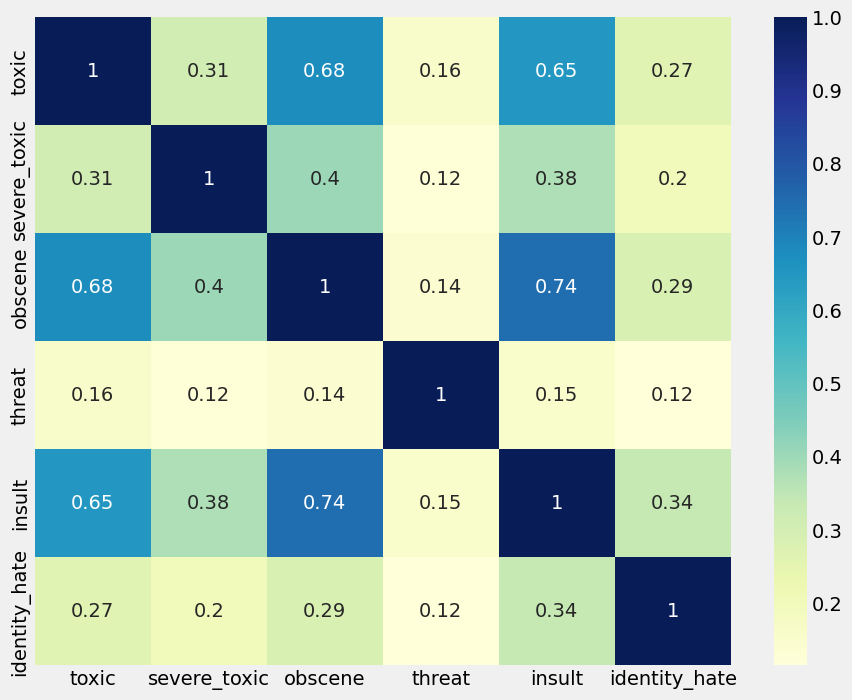

In [42]:
# filter temp by removing clean comments
# temp_df=temp_df[~train.clean]

corr=corr_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, cmap="YlGnBu")

Crosstab:

In [43]:
pd.crosstab(corr_df["insult"], corr_df["obscene"])

obscene,0,1
insult,,
0,149400,2294
1,1722,6155


In [44]:
# look at toxic with other tags
main_col="toxic"
corr_mats=[]
for other_col in corr_df.columns[1:]:
    confusion_matrix = pd.crosstab(corr_df[main_col], corr_df[other_col])
    corr_mats.append(confusion_matrix)

In [46]:
out = pd.concat(corr_mats,axis=1,keys=corr_df.columns[1:])
out

severe_toxic       obscene        threat       insult        \
severe_toxic            0     1       0     1       0    1       0     1   
toxic                                                                      
0                  144277     0  143754   523  144248   29  143744   533   
1                   13699  1595    7368  7926   14845  449    7950  7344   

             identity_hate        
severe_toxic             0     1  
toxic                             
0                   144174   103  
1                    13992  1302

### Let's read comments :)

In [48]:
pd.options.display.max_colwidth = None

In [52]:
train.loc[train["toxic"]==1].head(2)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,False
12,0005c987bdfc9d4b,"Hey... what is it..\n@ | talk .\nWhat is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?\n\nAsk Sityush to clean up his behavior than issue me nonsensical warnings...",1,0,0,0,0,0,False


In [53]:
train[train["toxic"]==1].head(2)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,False
12,0005c987bdfc9d4b,"Hey... what is it..\n@ | talk .\nWhat is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?\n\nAsk Sityush to clean up his behavior than issue me nonsensical warnings...",1,0,0,0,0,0,False


In [33]:
print("severe_toxic: \n")
print(train.loc[train["severe_toxic"]==1, "comment_text"].sample(1).iloc[0])

severe_toxic: 

Fuck You 

fuck you and wikipedia there is no reason those pages should be deleted so block me from editing but you can suck a dick stupid bitch ass fuckin fagget eat shit and die


In [34]:
print("threat: \n")
print(train.loc[train["threat"]==1, "comment_text"].sample(1).iloc[0])

threat: 

wish that the useless fat slobs would just die

nicholas brybon


### Wordcloud

In [55]:
#!pip install wordcloud

In [56]:
from wordcloud import WordCloud ,STOPWORDS

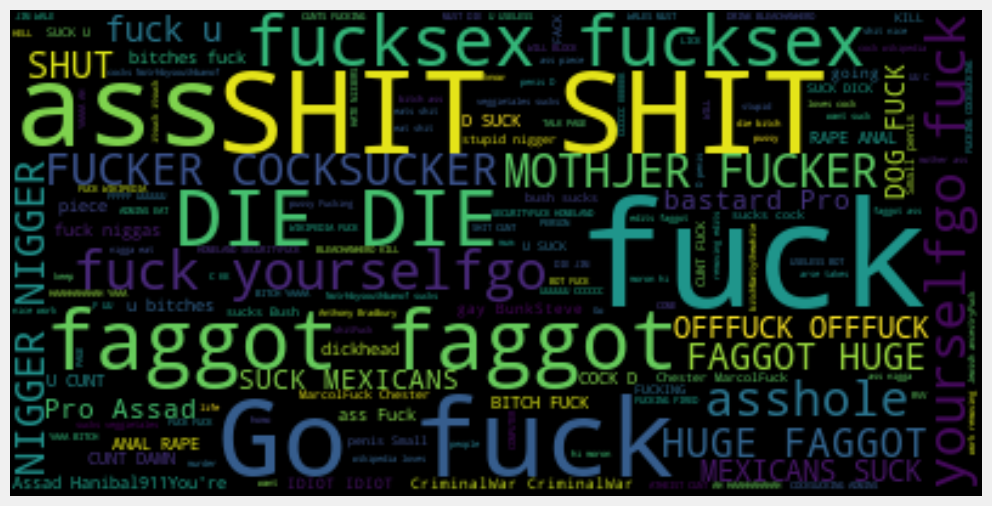

In [62]:
sample=train.loc[train["severe_toxic"]==1]

text=sample.comment_text.values

wc= WordCloud(max_font_size=60, background_color="black",max_words=2000,stopwords=STOPWORDS)
wc.generate(" ".join(text))
plt.figure(figsize=(12,6))
plt.axis("off")
plt.imshow(wc.recolor(colormap= "viridis" , random_state=17),
           interpolation="bilinear")
plt.show()

### Feature engineering:

In [65]:
import re
import string

Створимо нову фічу "кількість речень" у коментарі:

In [66]:
train["count_sent"]=train["comment_text"].apply(lambda x: len(re.findall("\n",str(x)))+1)

In [67]:
train[:2]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean,count_word,count_unique_word,count_letters,count_sent
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0,True,43,41,264,2
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0,True,17,17,112,1


І ще трохи нових фіч:

In [68]:
train["count_word"]=train["comment_text"].apply(lambda x: len(str(x).split()))
#Unique word count
train["count_unique_word"]=train["comment_text"].apply(lambda x: len(set(str(x).split())))
#Letter count
train["count_letters"]=train["comment_text"].apply(lambda x: len(str(x)))
#punctuation count
train["count_punctuations"] =train["comment_text"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
#upper case words count
train["count_words_upper"] = train["comment_text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
#title case words count
train["count_words_title"] = train["comment_text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
#Number of stopwords
train["count_stopwords"] = train["comment_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
#Average length of the words
train["mean_word_len"] = train["comment_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [69]:
#derived features
#Word count percent in each comment:
train["word_unique_percent"]=train["count_unique_word"]*100/train["count_word"]
#derived features
#Punct percent in each comment:
train["punct_percent"]=train["count_punctuations"]*100/train["count_word"]

### Cut long tails

<Axes: >

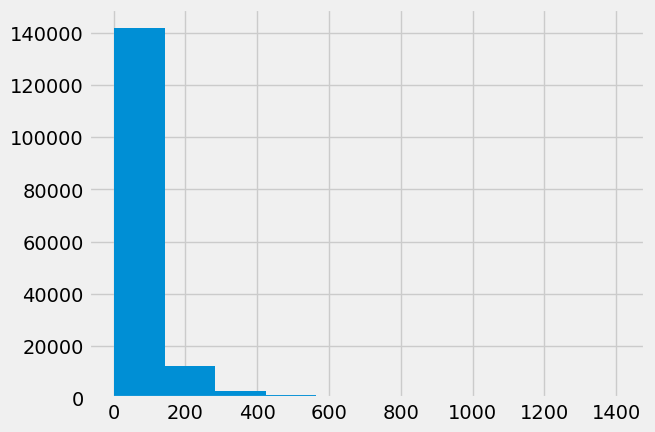

In [ ]:
train["count_word"].hist()

In [70]:
train["count_word"].max()

np.int64(1411)

***!!! Так робити не треба:***

In [71]:
train["count_word"].loc[train["count_word"]>200] = 200

C:\Users\De\AppData\Local\Temp\ipykernel_30384\1368231387.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train["count_word"].loc[train["count_word"]>200] = 200
C:\Users\De\AppData\Local\Temp\ipykernel_30384\1368231387.py:1: SettingWithC

***Треба так:***

In [72]:
train.loc[train["count_word"]>200, "count_word"] = 200

In [73]:
train["count_word"].max()

np.int64(200)

In [74]:
train.loc[train["count_sent"]>10, "count_sent"] = 10

In [75]:
train.loc[train["count_unique_word"]>200, "count_unique_word"] = 200

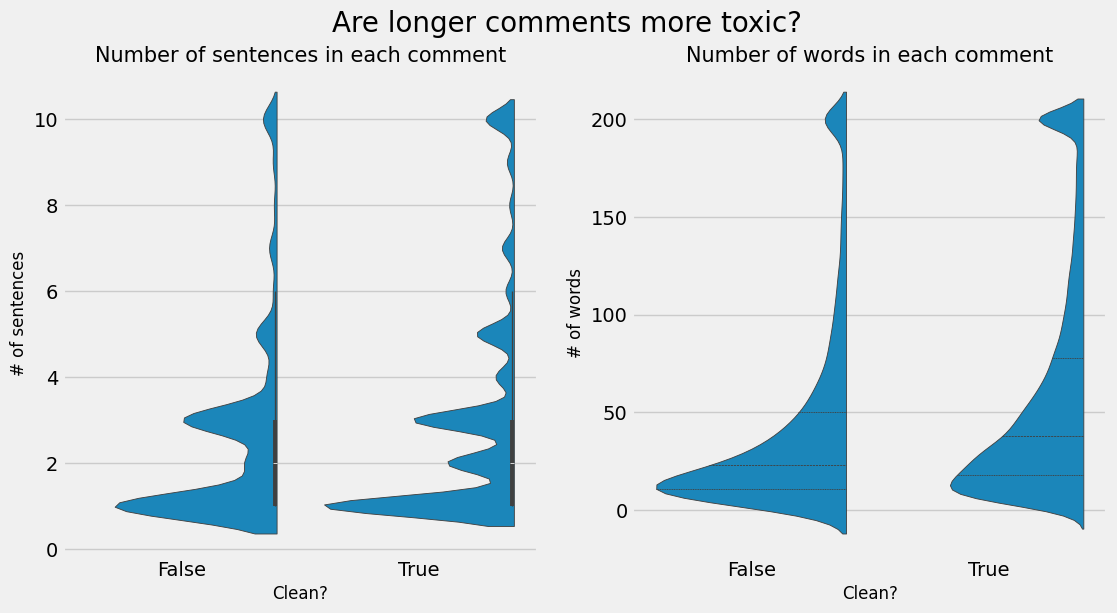

In [76]:
plt.figure(figsize=(12,6))
## sentenses
plt.subplot(121)
plt.suptitle("Are longer comments more toxic?",fontsize=20)
sns.violinplot(y="count_sent",x="clean", data=train, split=True)
plt.xlabel("Clean?", fontsize=12)
plt.ylabel("# of sentences", fontsize=12)
plt.title("Number of sentences in each comment", fontsize=15)
# words
plt.subplot(122)
sns.violinplot(y="count_word",x="clean", data=train, split=True, inner="quart")
plt.xlabel("Clean?", fontsize=12)
plt.ylabel("# of words", fontsize=12)
plt.title("Number of words in each comment", fontsize=15)

plt.show()

### Spammers

Подивимося як розподілені спам коментарі

In [78]:
#spammers - comments with less than 40% unique words
spammers=train.loc[train["word_unique_percent"]<30]

In [79]:
print("Clean Spam example:")
print(spammers.loc[spammers["clean"]==1, "comment_text"].iloc[1])

Clean Spam example:
Towns and Villages in Ark-La-Tex]]
 Cities, boroughs and towns in the Republic of Ireland
 Cities, boroughs, and townships along the Susquehanna River
 Cities, towns and villages in Alborz Province
 Cities, towns and villages in Ardabil Province
 Cities, towns and villages in Bhutan
 Cities, towns and villages in Bushehr Province
 Cities, towns and villages in Chaharmahal and Bakhtiari Province
 Cities, towns and villages in Cyprus
 Cities, towns and villages in Dutch Limburg
 Cities, towns and villages in East Azerbaijan Province
 Cities, towns and villages in East Timor
 Cities, towns and villages in Fars Province
 Cities, towns and villages in Flevoland
 Cities, towns and villages in Friesland
 Cities, towns and villages in Gelderland
 Cities, towns and villages in Gilan Province
 Cities, towns and villages in Golestan Province
 Cities, towns and villages in Groningen
 Cities, towns and villages in Hamadan Province
 Cities, towns and villages in Hormozgan Provinc

In [80]:
print("Toxic Spam example:")
print(spammers.loc[spammers["toxic"]==1, "comment_text"].iloc[5])

Toxic Spam example:
FAGGOT 
 FAGGOT 
 FAGGOT 
 FAGGOT


In [81]:
#For the desired plots , the data must be in long format
word_counts_df = pd.melt(spammers, value_vars=["count_word", "count_unique_word"], id_vars="clean")

word_counts_df.head()

,clean,variable,value
0,True,count_word,200
1,False,count_word,96
2,False,count_word,200
3,False,count_word,200
4,False,count_word,200


In [82]:
import matplotlib.gridspec as gridspec

C:\Users\De\AppData\Local\Temp\ipykernel_30384\1752753797.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(spammers.loc[spammers["clean"] == 0, "word_unique_percent"], label="Bad",shade=True,color="r")


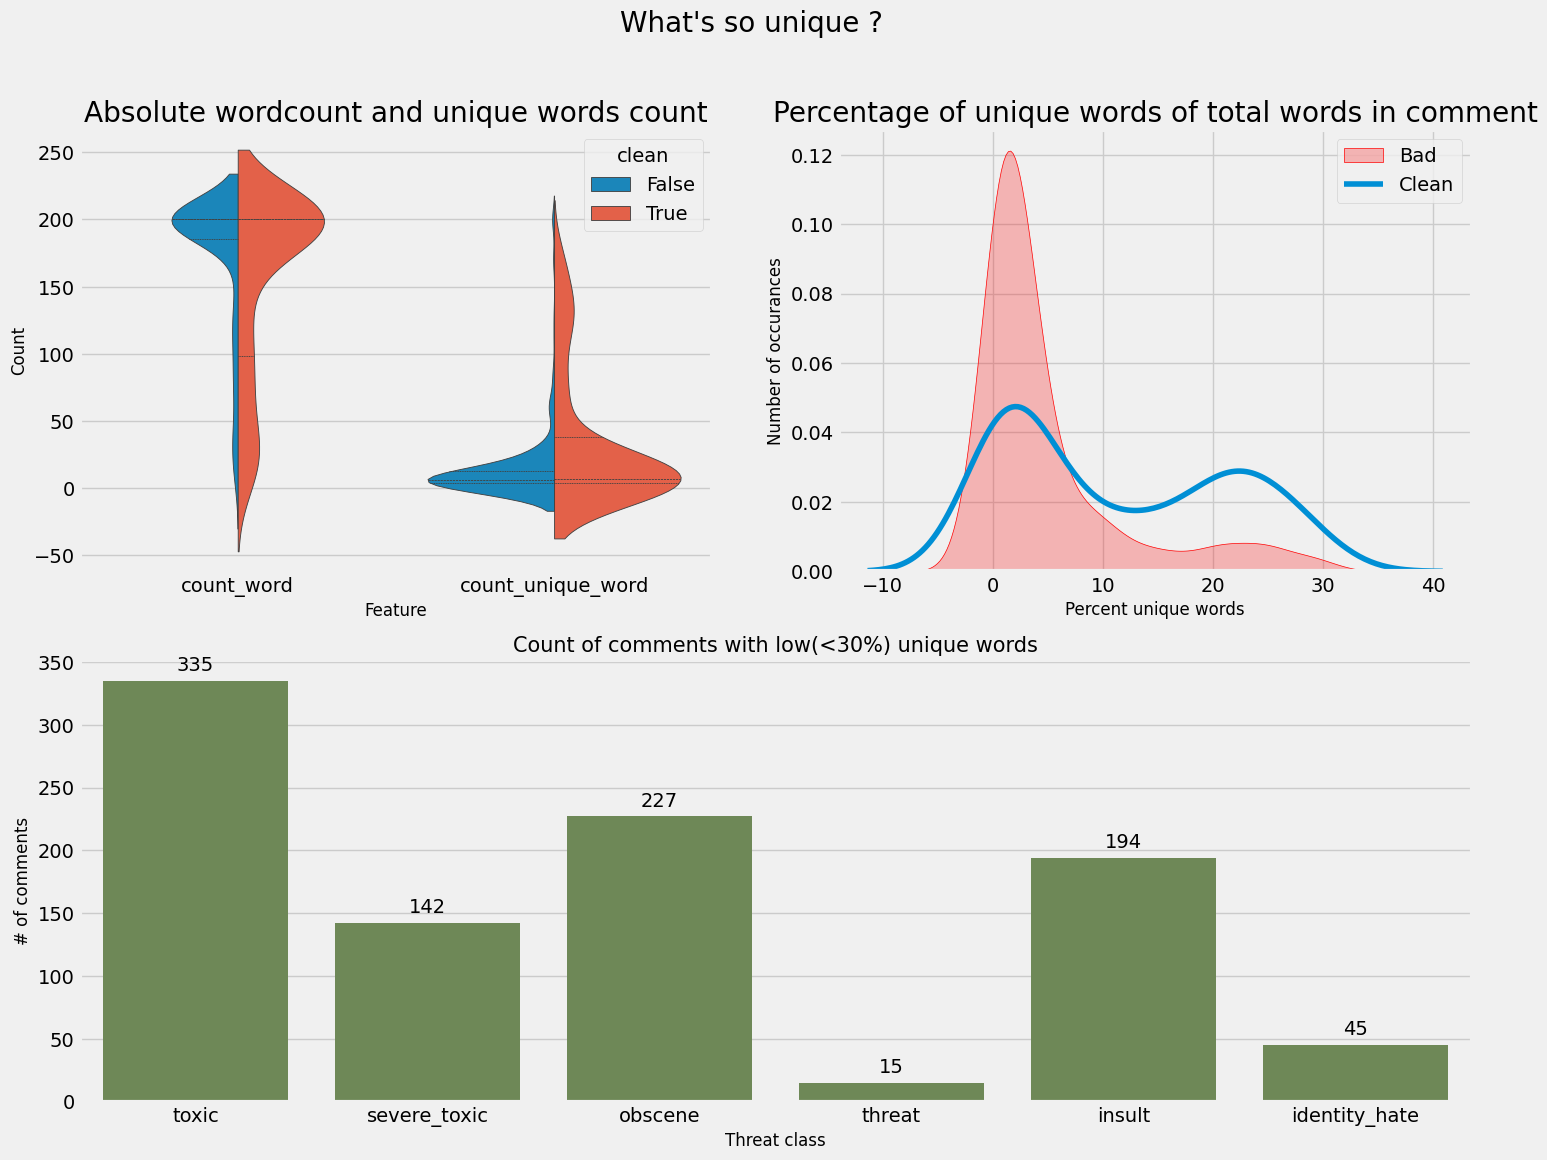

In [83]:
plt.figure(figsize=(16,12))
plt.suptitle("What's so unique ?",fontsize=20)
gridspec.GridSpec(2,2)
plt.subplot2grid((2,2),(0,0))
sns.violinplot(x="variable", y="value", hue="clean", data=word_counts_df, split=True,inner="quartile")
plt.title("Absolute wordcount and unique words count")
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.subplot2grid((2,2),(0,1))
plt.title("Percentage of unique words of total words in comment")
#sns.boxplot(x='clean', y='word_unique_percent', data=train_feats)
ax=sns.kdeplot(spammers.loc[spammers["clean"] == 0, "word_unique_percent"], label="Bad",shade=True,color="r")
ax=sns.kdeplot(spammers.loc[spammers["clean"] == 1, "word_unique_percent"], label="Clean")
plt.legend()
plt.ylabel("Number of occurances", fontsize=12)
plt.xlabel("Percent unique words", fontsize=12)

x=spammers.iloc[:,2:8].sum()
plt.subplot2grid((2,2),(1,0),colspan=2)
plt.title("Count of comments with low(<30%) unique words",fontsize=15)
ax=sns.barplot(x=x.index, y=x.values,color=color[3])

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha="center", va="bottom")

plt.xlabel("Threat class", fontsize=12)
plt.ylabel("# of comments", fontsize=12)
plt.show()

**Висновок: спамери пишуть "токсичніші" коментарі. Це буде гарною фічею для ML**
